In [2]:
'''This program uses an artificial neural network called Long SHort Term Memory (LSTM)
to predict the closing stock price of a corporation BAJAJFINANCE using the past 100 day stock price.'''

import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
df = yf.download('BAJFINANCE.NS',start='2000-01-01',end='2023-05-12')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,5.239737,5.540927,5.239737,5.412679,3.986740,21923
2002-07-02,5.523439,5.537041,5.421423,5.443769,4.009639,61044
2002-07-03,5.505950,5.545785,5.328151,5.466116,4.026100,34160
2002-07-04,5.501093,5.572018,5.417537,5.528297,4.071900,27892
2002-07-05,5.563274,5.656546,5.474860,5.590478,4.117699,58976
...,...,...,...,...,...,...
2023-05-05,6379.950195,6448.000000,6331.649902,6389.850098,6389.850098,1160040
2023-05-08,6394.450195,6695.100098,6388.000000,6657.950195,6657.950195,2224735
2023-05-09,6650.000000,6739.850098,6542.000000,6552.250000,6552.250000,2130770


In [6]:
df.shape

(5182, 6)

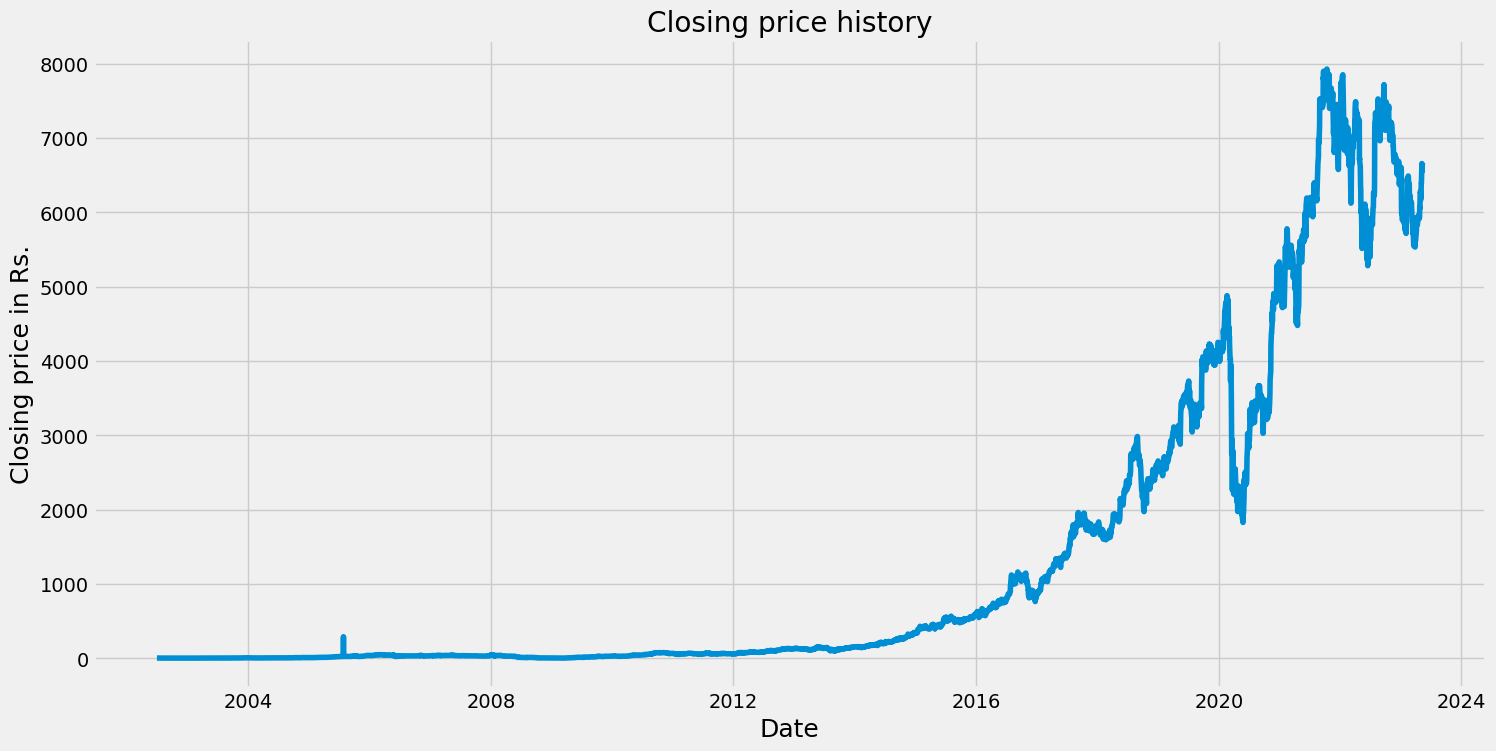

In [7]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price in Rs.',fontsize=18)
plt.show()

In [8]:
#create a new dataframe with only the 'close' column
data = df.filter(['Close'])
#converting to numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

4146

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.70159620e-04],
       [1.74082504e-04],
       [1.76902227e-04],
       ...,
       [8.26244940e-01],
       [8.36244642e-01],
       [8.40276093e-01]])

In [10]:
#Create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
x_train=[]
y_train=[]
for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])
    if i<=101:
        print(x_train)
        print(y_train)
        print()

[array([1.70159620e-04, 1.74082504e-04, 1.76902227e-04, 1.84748176e-04,
       1.92594126e-04, 1.97007491e-04, 1.95904210e-04, 1.46131291e-04,
       1.41595246e-04, 1.58390606e-04, 1.60106867e-04, 1.57900245e-04,
       1.23696605e-04, 1.28232650e-04, 1.37181881e-04, 1.14747374e-04,
       1.25903347e-04, 1.25903347e-04, 9.90554762e-05, 1.01875079e-04,
       2.35378474e-05, 2.68478713e-05, 1.85116218e-05, 4.97729184e-05,
       5.47992643e-05, 9.18223875e-05, 7.39237465e-05, 8.67960416e-05,
       7.39237465e-05, 8.05438544e-05, 6.93878213e-05, 6.43614753e-05,
       5.98256103e-05, 5.98256103e-05, 7.33107657e-05, 6.04384707e-05,
       4.58498536e-05, 4.75661154e-05, 4.69531347e-05, 5.25925216e-05,
       4.69531347e-05, 4.69531347e-05, 4.36432311e-05, 3.57972820e-05,
       5.82318483e-05, 3.57972820e-05, 3.86168852e-05, 4.69531347e-05,
       5.08761995e-05, 4.69531347e-05, 4.25399500e-05, 4.25399500e-05,
       3.92298660e-05, 4.81790962e-05, 4.69531347e-05, 4.64628343e-05,
     

In [11]:
#convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4046, 100, 1)

In [13]:
#build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

4046/4046 [==============================] - 281s 68ms/step - loss: 1.6212e-04


In [17]:
#Create the testing dataset
#Create a new array containing scaled values from index 2187 to 2858
test_data = scaled_data[training_data_len-100:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [18]:
#converting the data to numpy array
x_test = np.array(x_test)

In [19]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
#Get the models predicted price values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

33/33 [==============================] - 3s 42ms/step


In [21]:
#getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

301.84219596008535

C:\Users\Admin\AppData\Local\Temp\ipykernel_17204\2520235928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


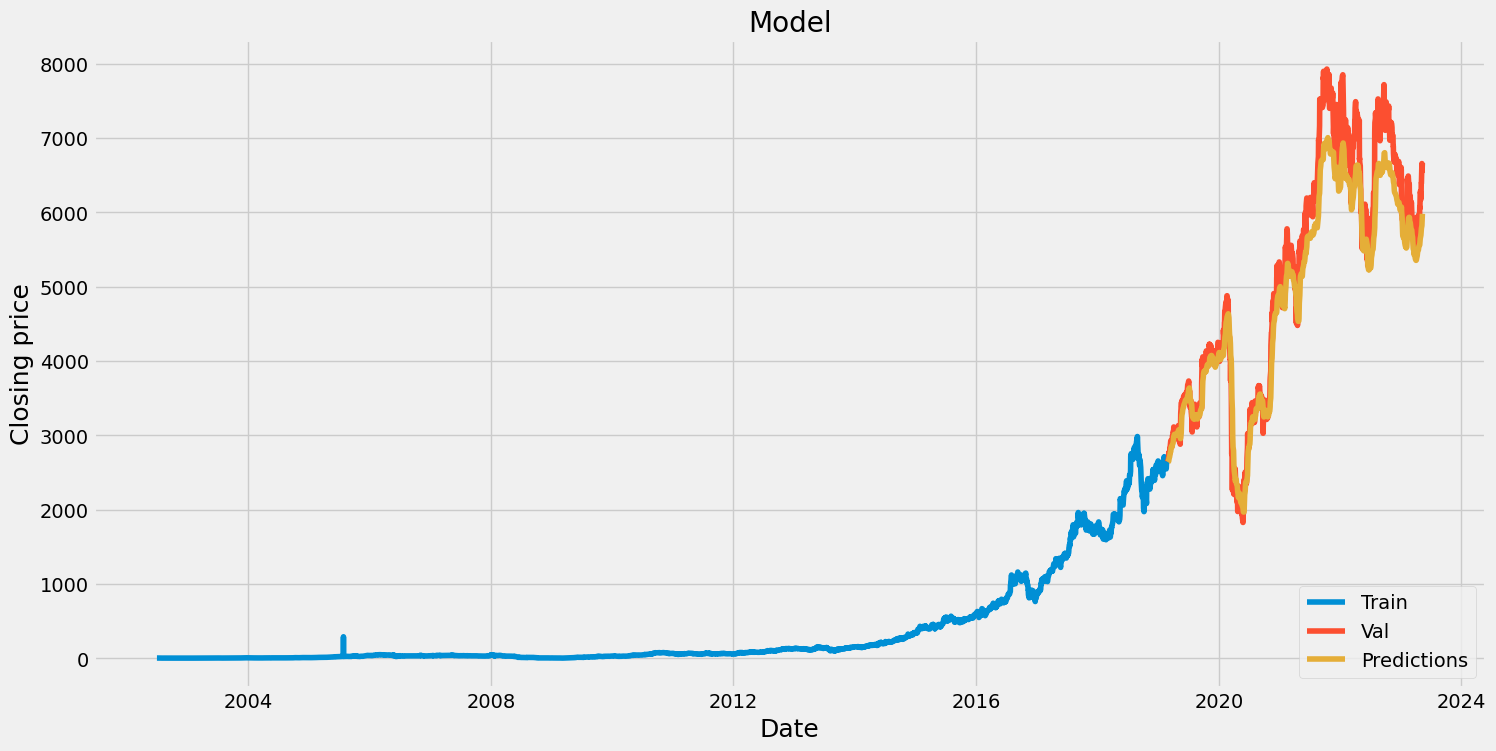

In [22]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [23]:
#Show the Actual and predicted price
valid

,Close,Predictions
Date,,
2019-02-28,2649.000000,2643.550537
2019-03-01,2660.750000,2646.581543
2019-03-05,2695.149902,2650.383057
2019-03-06,2766.699951,2659.020264
2019-03-07,2734.800049,2678.684326
...,...,...
2023-05-05,6389.850098,5785.462891
2023-05-08,6657.950195,5821.597656
2023-05-09,6552.250000,5887.405273


In [26]:
#get the quote
apple_quote = yf.download('BAJFINANCE.NS',start='2000-01-01',end='2023-05-12')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_100_days = new_df[-100:].values
#scale the data to be values between 0 and 1
last_100_days_scaled = scaler.transform(last_100_days)
#create an empty list
X_test = []
#append last 100 days 
X_test.append(last_100_days_scaled)
#convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 63ms/step
[[6022.228]]
